<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n250.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.752849,55.892449,-0.002152,135.643146,135.645043,-0.001897
1,0.0,1.0,88.999590,39.362904,-0.005308,138.357186,138.361834,-0.004647
2,0.0,2.0,35.911003,43.633732,0.000668,89.545402,89.546117,-0.000715
3,0.0,3.0,46.836167,45.912852,-0.003876,102.745144,102.749911,-0.004768
4,0.0,4.0,24.975682,60.351804,0.000141,95.327627,95.328935,-0.001308
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.118759,69.367788,0.000778,144.487325,144.486145,0.001179
19996,999.0,16.0,87.238493,42.419472,0.002539,139.660503,139.657124,0.003380
19997,999.0,17.0,51.656605,34.183593,0.000199,95.840397,95.838506,0.001891
19998,999.0,18.0,79.085912,57.631333,-0.002894,146.714351,146.716725,-0.002375


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.752849,55.892449,-0.002152,135.643146,135.645043,-0.001897
1,0.0,1.0,88.999590,39.362904,-0.005308,138.357186,138.361834,-0.004647
2,0.0,2.0,35.911003,43.633732,0.000668,89.545402,89.546117,-0.000715
3,0.0,3.0,46.836167,45.912852,-0.003876,102.745144,102.749911,-0.004768
4,0.0,4.0,24.975682,60.351804,0.000141,95.327627,95.328935,-0.001308
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.118759,69.367788,0.000778,144.487325,144.486145,0.001179
19996,999.0,16.0,87.238493,42.419472,0.002539,139.660503,139.657124,0.003380
19997,999.0,17.0,51.656605,34.183593,0.000199,95.840397,95.838506,0.001891
19998,999.0,18.0,79.085912,57.631333,-0.002894,146.714351,146.716725,-0.002375


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.752849  55.892449 -0.002152  135.643146  135.645043 -0.001897
      1.0    88.999590  39.362904 -0.005308  138.357186  138.361834 -0.004647
      2.0    35.911003  43.633732  0.000668   89.545402   89.546117 -0.000715
      3.0    46.836167  45.912852 -0.003876  102.745144  102.749911 -0.004768
      4.0    24.975682  60.351804  0.000141   95.327627   95.328935 -0.001308
...                ...        ...       ...         ...         ...       ...
999.0 15.0   65.118759  69.367788  0.000778  144.487325  144.486145  0.001179
      16.0   87.238493  42.419472  0.002539  139.660503  139.657124  0.003380
      17.0   51.656605  34.183593  0.000199   95.840397   95.838506  0.001891
      18.0   79.085912  57.631333 -0.002894  146.714351  146.716725 -0.002375
      19.0   24.360781  38.512206  0.000195   72.873182   72.870963  0.002218

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.752849  55.892449 -0.002152  135.643146  135.645043 -0.001897
      1.0    88.999590  39.362904 -0.005308  138.357186  138.361834 -0.004647
      2.0    35.911003  43.633732  0.000668   89.545402   89.546117 -0.000715
      3.0    46.836167  45.912852 -0.003876  102.745144  102.749911 -0.004768
      4.0    24.975682  60.351804  0.000141   95.327627   95.328935 -0.001308
...                ...        ...       ...         ...         ...       ...
999.0 15.0   65.118759  69.367788  0.000778  144.487325  144.486145  0.001179
      16.0   87.238493  42.419472  0.002539  139.660503  139.657124  0.003380
      17.0   51.656605  34.183593  0.000199   95.840397   95.838506  0.001891
      18.0   79.085912  57.631333 -0.002894  146.714351  146.716725 -0.002375
      19.0   24.360781  38.512206  0.000195   72.873182   72.870963  0.002218

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.752849,55.892449,-0.002152,135.643146,135.645043,-0.001897
1,0.0,1.0,88.999590,39.362904,-0.005308,138.357186,138.361834,-0.004647
2,0.0,2.0,35.911003,43.633732,0.000668,89.545402,89.546117,-0.000715
3,0.0,3.0,46.836167,45.912852,-0.003876,102.745144,102.749911,-0.004768
4,0.0,4.0,24.975682,60.351804,0.000141,95.327627,95.328935,-0.001308
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.118759,69.367788,0.000778,144.487325,144.486145,0.001179
19996,999.0,16.0,87.238493,42.419472,0.002539,139.660503,139.657124,0.003380
19997,999.0,17.0,51.656605,34.183593,0.000199,95.840397,95.838506,0.001891
19998,999.0,18.0,79.085912,57.631333,-0.002894,146.714351,146.716725,-0.002375


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.752849  55.892449 -0.002152  135.643146  135.645043 -0.001897
      1.0    88.999590  39.362904 -0.005308  138.357186  138.361834 -0.004647
      2.0    35.911003  43.633732  0.000668   89.545402   89.546117 -0.000715
      3.0    46.836167  45.912852 -0.003876  102.745144  102.749911 -0.004768
      4.0    24.975682  60.351804  0.000141   95.327627   95.328935 -0.001308
...                ...        ...       ...         ...         ...       ...
999.0 15.0   65.118759  69.367788  0.000778  144.487325  144.486145  0.001179
      16.0   87.238493  42.419472  0.002539  139.660503  139.657124  0.003380
      17.0   51.656605  34.183593  0.000199   95.840397   95.838506  0.001891
      18.0   79.085912  57.631333 -0.002894  146.714351  146.716725 -0.002375
      19.0   24.360781  38.512206  0.000195   72.873182   72.870963  0.002218

[20000 rows x 6 columns]

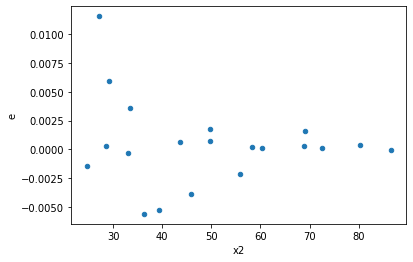

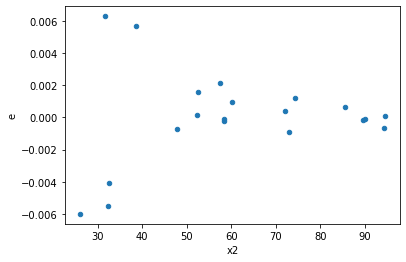

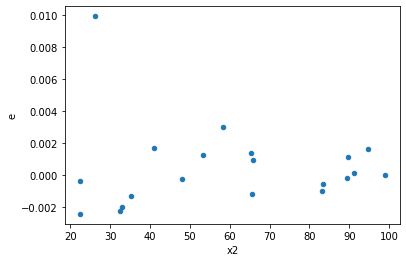

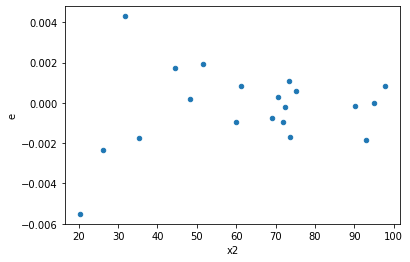

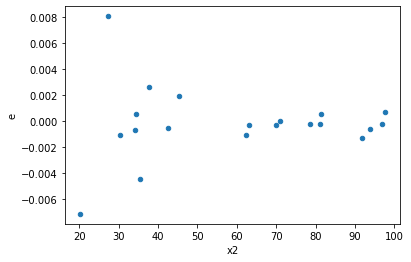

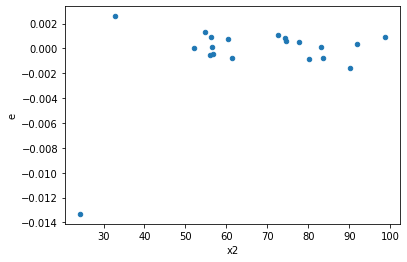

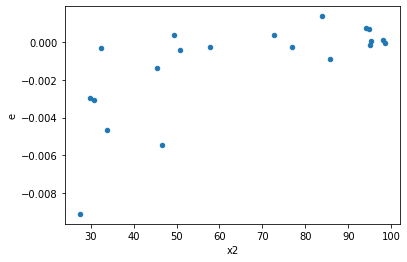

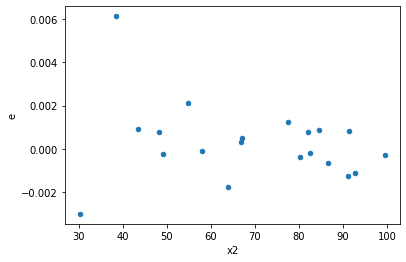

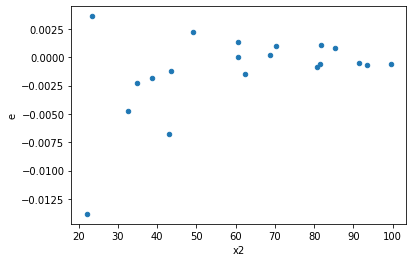

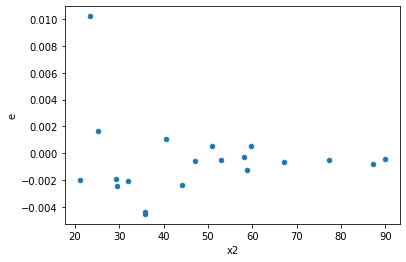

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
19.0,6.0,6.0,6.233764977774045e-06,6.53669736202099e-06,1.0389608296290075e-06,1.0894495603368316e-06,1.0485954130973856,0.9555391836531788,0.5222304081734106,0.4777695918265894,Reject005=1 : Homoscedasticity
27.0,6.0,6.0,1.9575371597225485e-05,2.906387712465815e-05,3.262561932870914e-06,4.843979520776358e-06,1.484716495945217,0.6434004525881369,0.6782997737059315,0.32170022629406847,Reject005=1 : Homoscedasticity
29.0,6.0,6.0,8.154323490140913e-06,1.638779630579731e-05,1.3590539150234855e-06,2.731299384299552e-06,2.0097064245257354,0.41657300593543,0.791713497032285,0.208286502967715,Reject005=1 : Homoscedasticity
41.0,6.0,6.0,2.1142554408178564e-05,5.865354006897467e-05,3.5237590680297607e-06,9.775590011495778e-06,2.7741936445619717,0.23983103177379128,0.8800844841131044,0.11991551588689564,Reject005=1 : Homoscedasticity
46.0,6.0,6.0,4.37497496587543e-06,6.446868395183774e-06,7.291624943125716e-07,1.0744780658639624e-06,1.473578350840634,0.6496980606252856,0.6751509696873572,0.3248490303126428,Reject005=1 : Homoscedasticity
55.0,6.0,6.0,7.053688519584551e-06,8.343318581364575e-06,1.1756147532640918e-06,1.3905530968940958e-06,1.1828305939792165,0.8436857937939723,0.5781571031030138,0.4218428968969862,Reject005=1 : Homoscedasticity
74.0,6.0,6.0,8.143839055999569e-06,1.8106566458104516e-05,1.3573065093332614e-06,3.0177610763507525e-06,2.2233453207508322,0.35376872843595186,0.8231156357820241,0.17688436421797593,Reject005=1 : Homoscedasticity
75.0,6.0,6.0,4.7197889394200385e-06,7.093975428636881e-06,7.866314899033398e-07,1.1823292381061468e-06,1.5030281056399482,0.6332082797869796,0.6833958601065102,0.3166041398934898,Reject005=1 : Homoscedasticity
101.0,6.0,6.0,1.5550750552121066e-05,4.957215804968231e-05,2.5917917586868445e-06,8.262026341613718e-06,3.187766267842348,0.18409685835062506,0.9079515708246875,0.09204842917531253,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,9.736648535186439e-05,2.0920755070005045e-05,1.6227747558644066e-05,3.4867925116675075e-06,0.21486608040129335,0.08337114715916176,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,1.7968851667001166e-05,2.217190062200579e-06,2.994808611166861e-06,3.6953167703342985e-07,0.12339074879628117,0.022327796223213816,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,8.097182241684541e-06,5.8793166978450565e-06,1.3495303736140901e-06,9.798861163075093e-07,0.726094155023232,0.7074220744782724,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,2.8503065658444676e-05,3.758876135745724e-06,4.750510943074113e-06,6.264793559576206e-07,0.13187620520503807,0.02636177526437691,Reject005=0 : Heteroscedasticity
4.0,6.0,6.0,5.24257527635706e-05,2.708180267707972e-06,8.7376254605951e-06,4.5136337795132865e-07,0.051657441714214575,0.0021991000818134777,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,8.07913524933684e-05,4.372778915072801e-06,1.34652254155614e-05,7.287964858454669e-07,0.05412434351104262,0.0025030486717507903,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,3.3808144830023787e-05,1.1041411257774978e-06,5.634690805003964e-06,1.840235209629163e-07,0.03265902732400005,0.0006030247225734851,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,2.3984168426829903e-05,2.998375262317335e-06,3.99736140447165e-06,4.997292103862225e-07,0.1250147684488073,0.023072419666256345,Reject005=0 : Heteroscedasticity
8.0,6.0,6.0,0.0001117458086660072,5.293548774052821e-06,1.8624301444334534e-05,8.822581290088036e-07,0.04737134069944859,0.0017271712897262293,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    557
Reject005=1 : Homoscedasticity      443
Name: Result_test, dtype: int64